# Lab 8 - limit cycles and bifurcations

### Name: 
### Lab section:

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import ode #ode solver package

ModuleNotFoundError: No module named 'scipy'

### Assignment Overview:

We learned about limit cycles, which are isolated closed orbits in the phase plane. The Poincare-Bendixson (PB) theorem states that "a region of the plane which contains a single unstable fixed point, and for which the direction of the flow everywhere on the boundary is inward, must contain a limit cycle." In today's lab, you will use the theorem to analyze the FitzHugh Nagumo (FHN) model. 

First, a quick summary of action potential dynamics. In the simplest terms, for a resting neuron there is a resting membrane potential at which level the neuron is 'quiet' (i.e., the inward and outward currents are balanced). This potential is negative, which means that there is more negative charge inside the neuron than outside. A neuron can be perturbed from its resting state by several mechanisms, the most classic of which is a depolarization in which the membrane potential decreases (i.e., the difference between the inside of the cell and outside of the cell decreases). If this depolarization reaches a certain 'threshold', then a cascade of events starts that will end up giving us the classical action potential. First, voltage gated $Na^+$ channels open, which allows the influx of $Na^+$ ions and the further depolarization of the neuron (this is the upstroke) that results in a positive feedback until the maximal number of $Na^+$ ion channels are open, at which point they enter an inactive period. This inactivation reduces the inward flow of $Na^+$ ions. The $K^+$ channels are now open, which allows an outward flow of positive charge. Both of these lead to the neuron repolarizing (the downstroke). Typically, the neuron will then enter a refractory period in which it may not be able to generate another action potential for some period. The classic Hodgkin-Huxley model takes all of these factors, and more, into account, which is one of the reasons it ends up being a system of four equations.

The FHN model has only two variables, which allows us to graph the system in the plane and thereby to visualize its properties. While it gives up biological realism, it still captures many of the dynamics of an action potential. In this lab you will also be asked to relate voltage traces (against time) to a phase portrait. 

The FHN is defined as:

$$    dV/dt = V(a-V)(V-1) - w + I $$
$$    dw/dt = bV - cw $$


 * $V$ mimics the membrane voltage
 * $w$ mimics the outward current; sometimes called the recovery variable
 * $a$ determines the shape of the cubic nullcline
 * $b$ and $c$  determine the kinetics of $w$ ($b>0, c>=0$)
 * $I$ is the injection current.

**Part 1: FHN model with no applied current**

Set the applied current $I$ to zero and analyze the FHN model with different parameter values by doing the following:

 1. Plot the *global* phase plane flow by picking a range that includes all the fixed points. Overlay the nullclines using different colors for the V-nullcline and the w-nullcline. 
 2. Solve the FHN ODE using the ode solver and plot 4 solution trajectories (with different initial conditions) on top of the phase plane portrait. Describe the behavior of the solution trajectories you plotted.
 3. Describe the global phase portrait by 1) noting all the fixed points and their stability; 2) noting the presence of trapping regions and limit cycles; 3) describing what happens for different solutions in the long run. 


**Q1.1:** Use $a=4; b=5; c=1; I=0$

/Users/dkon/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


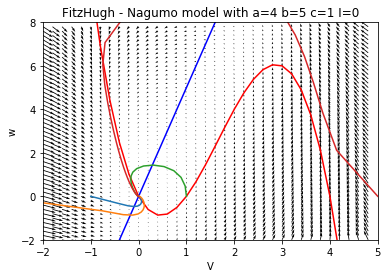

In [12]:
a=4
b=5
c=1
I=0

# 1. Make phase plane plot
vmin = -2 #change the parameters here to control the range of the axes
vmax = 5
wmin = -2
wmax = 8
dv = 0.2 #set the size of the x-step on the grid
dw = 0.2 #set the size of the y-step on the grid
V = np.arange(vmin, vmax, dv)
W = np.arange(wmin, wmax, dw)
v, w = np.meshgrid(V, W)  #create a grid
    
dV = v*(a-v)*(v-1)-w+I
dW = b*v -c*w

Vvec = np.arange(vmin, vmax, dv) # create a vector of V
Vnull = I + Vvec*(a-Vvec)*(Vvec -1) # V-nullcline
Wnull = b/c*Vvec # W-nullcline


#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(v, w, dV, dW)
plt.xlim(vmin, vmax)
plt.ylim(wmin, wmax)

plt.plot(Vvec,Vnull , 'r') # plot the  V-nullcline
plt.plot(Vvec,Wnull, 'b') # plot the W-nullcline


# 2. Plot four solutions
def fun(t, xy, a, b, c, I):
    newxy = [xy[0]*(a-xy[0])*(xy[0]-1)-xy[1]+I, b*xy[0] - c*xy[1] ]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
solver.set_f_params(a,b,c,I)


# Set up arrays of initial values
Vinit = [-1, -3, 1, 5]
Winit = [0, 0, 0, 0]


for j in range(len(Vinit)):

    # Set the initial values.
    t0 = 0.0 #initial time
    xy0 = [Vinit[j], Winit[j]] #[intial x, initial y]
    solver.set_initial_value(xy0, t0)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t1 = 20
    dt = .1
    numsteps=int((t1-t0)/dt) #number of steps including the initial
    t = np.arange(t0, t1, dt)
    sol = np.zeros((numsteps, 2))
    sol[0] = xy0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[i], and save the solution in sol[i].
    for i in range(numsteps):
        solver.integrate(t[i])
        sol[i] = solver.y
    plt.plot(sol[:,0], sol[:,1])

plt.xlabel('V') 
plt.ylabel('w')
plt.title('FitzHugh - Nagumo model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' I='+ str(I))
plt.show()

For these paratemer values there is one stable fixed point at (0,0). There is only one basin of attraction and no limit cycles.

**Q1.2:** Keeping the other parameters the same, gradually decrease $b$ from 5 to 0 and describe the type of bifurcation that occurs and how it changes the global phase plan flow. Report (appoximately) the critical value of $b_c$, and do tasks 1 through 3 above for some value of $b$ below the critical value. Are oscillation possible for these parameters?

/Users/dkon/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


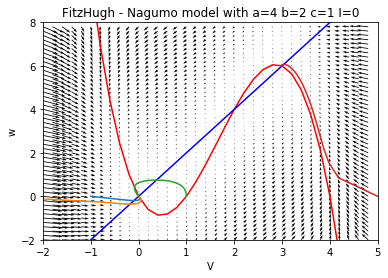

In [13]:
a=4
b=2
c=1
I=0

# 1. Make phase plane plot
vmin = -2 #change the parameters here to control the range of the axes
vmax = 5
wmin = -2
wmax = 8
dv = 0.2 #set the size of the x-step on the grid
dw = 0.2 #set the size of the y-step on the grid
V = np.arange(vmin, vmax, dv)
W = np.arange(wmin, wmax, dw)
v, w = np.meshgrid(V, W)  #create a grid
    
dV = v*(a-v)*(v-1)-w+I
dW = b*v -c*w

Vvec = np.arange(vmin, vmax, dv) # create a vector of V
Vnull = I + Vvec*(a-Vvec)*(Vvec -1) # V-nullcline
Wnull = b/c*Vvec # W-nullcline


#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(v, w, dV, dW)
plt.xlim(vmin, vmax)
plt.ylim(wmin, wmax)

plt.plot(Vvec,Vnull , 'r') # plot the  V-nullcline
plt.plot(Vvec,Wnull, 'b') # plot the W-nullcline


# 2. Plot four solutions
def fun(t, xy, a, b, c, I):
    newxy = [xy[0]*(a-xy[0])*(xy[0]-1)-xy[1]+I, b*xy[0] - c*xy[1] ]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
solver.set_f_params(a,b,c,I)


# Set up arrays of initial values
Vinit = [-1, -3, 1, 5]
Winit = [0, 0, 0, 0]


for j in range(len(Vinit)):

    # Set the initial values.
    t0 = 0.0 #initial time
    xy0 = [Vinit[j], Winit[j]] #[intial x, initial y]
    solver.set_initial_value(xy0, t0)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t1 = 20
    dt = .1
    numsteps=int((t1-t0)/dt) #number of steps including the initial
    t = np.arange(t0, t1, dt)
    sol = np.zeros((numsteps, 2))
    sol[0] = xy0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[i], and save the solution in sol[i].
    for i in range(numsteps):
        solver.integrate(t[i])
        sol[i] = solver.y
    plt.plot(sol[:,0], sol[:,1])

plt.xlabel('V') 
plt.ylabel('w')
plt.title('FitzHugh - Nagumo model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' I='+ str(I))
plt.show()

There is a bifurcation that occurs between b=2 and b=3. This is called a saddle-node bifurcation. Below the critical value there are three fixed points: two stable and one unstable (saddle). There are two basins of attraction, but no limit cycles, since there are no flow trapping regions without a stable fixed point within.

### Part 2: FHN model with applied current
In this part you will experiment with increasing the applied current I in the model. Once again, do the following tasks:

 1. Plot the *global* phase plane flow by picking a range that includes all the fixed points. Overlay the nullclines using different colors for the V-nullcline and the w-nullcline. 
 2. Solve the FHN ODE using the ode solver and plot 4 solution trajectories (with different initial conditions) on top of the phase plane portrait. Describe the behavior of the solution trajectories you plotted.
 3. Describe the global phase portrait by 1) noting all the fixed points and their stability; 2) noting the presence of trapping regions and limit cycles; 3) describing what happens for different solutions in the long run. 

**Q2.1:** Starting with the same parameter values as in 1.1, increase the current $I$ gradually until you observe a bifurcation in the phase portrait. (Hint: you will need to adjust the limits of the phase plane window to see the change.) Report the critical value $I_c$ (approximately) at which this occurs and classify the bifurcation.  For a value $I$ above the critical value, do tasks 1 through 3 above. Are oscillation possible in this regime?

/Users/dkon/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


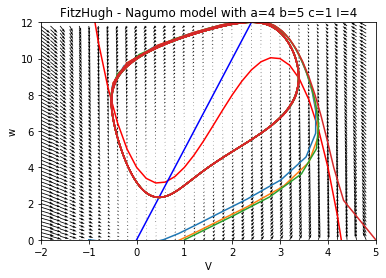

In [25]:
a=4
b=5
c=1
I=4

# 1. Make phase plane plot
vmin = -2 #change the parameters here to control the range of the axes
vmax = 5
wmin = 0
wmax = 12
dv = 0.2 #set the size of the x-step on the grid
dw = 0.2 #set the size of the y-step on the grid
V = np.arange(vmin, vmax, dv)
W = np.arange(wmin, wmax, dw)
v, w = np.meshgrid(V, W)  #create a grid
    
dV = v*(a-v)*(v-1)-w+I
dW = b*v -c*w

Vvec = np.arange(vmin, vmax, dv) # create a vector of V
Vnull = I + Vvec*(a-Vvec)*(Vvec -1) # V-nullcline
Wnull = b/c*Vvec # W-nullcline


#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(v, w, dV, dW)
plt.xlim(vmin, vmax)
plt.ylim(wmin, wmax)

plt.plot(Vvec,Vnull , 'r') # plot the  V-nullcline
plt.plot(Vvec,Wnull, 'b') # plot the W-nullcline


# 2. Plot four solutions
def fun(t, xy, a, b, c, I):
    newxy = [xy[0]*(a-xy[0])*(xy[0]-1)-xy[1]+I, b*xy[0] - c*xy[1] ]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
solver.set_f_params(a,b,c,I)


# Set up arrays of initial values
Vinit = [-1, -3, 1, 5]
Winit = [0, 0, 0, 0]


for j in range(len(Vinit)):

    # Set the initial values.
    t0 = 0.0 #initial time
    xy0 = [Vinit[j], Winit[j]] #[intial x, initial y]
    solver.set_initial_value(xy0, t0)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t1 = 20
    dt = .1
    numsteps=int((t1-t0)/dt) #number of steps including the initial
    t = np.arange(t0, t1, dt)
    sol = np.zeros((numsteps, 2))
    sol[0] = xy0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[i], and save the solution in sol[i].
    for i in range(numsteps):
        solver.integrate(t[i])
        sol[i] = solver.y
    plt.plot(sol[:,0], sol[:,1])

plt.xlabel('V') 
plt.ylabel('w')
plt.title('FitzHugh - Nagumo model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' I='+ str(I))
plt.show()

There is a bifurcation  between I=3 and I=4. This is called a Hopf bifurcation. Below the critical value there is one stable fixed point and above it the fixed point is unstable. At I=4 there are no basins of attraction, but there is a flow trapping region which produces a limit cycle.

**Q2.2:** Now increase $I$ further until you observe another bifurcation. Report the second critical value $I_{c2}$ (approximately) at which this occurs and classify the bifurcation.   For a value $I$ above the second critical value, do tasks 1 through 3 above. Are oscillation possible in this regime? 

/Users/dkon/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


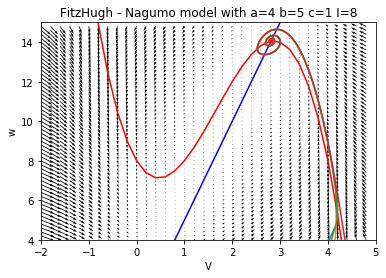

In [23]:
a=4
b=5
c=1
I=8

# 1. Make phase plane plot
vmin = -2 #change the parameters here to control the range of the axes
vmax = 5
wmin = 4
wmax = 15
dv = 0.2 #set the size of the x-step on the grid
dw = 0.2 #set the size of the y-step on the grid
V = np.arange(vmin, vmax, dv)
W = np.arange(wmin, wmax, dw)
v, w = np.meshgrid(V, W)  #create a grid
    
dV = v*(a-v)*(v-1)-w+I
dW = b*v -c*w

Vvec = np.arange(vmin, vmax, dv) # create a vector of V
Vnull = I + Vvec*(a-Vvec)*(Vvec -1) # V-nullcline
Wnull = b/c*Vvec # W-nullcline


#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(v, w, dV, dW)
plt.xlim(vmin, vmax)
plt.ylim(wmin, wmax)

plt.plot(Vvec,Vnull , 'r') # plot the  V-nullcline
plt.plot(Vvec,Wnull, 'b') # plot the W-nullcline


# 2. Plot four solutions
def fun(t, xy, a, b, c, I):
    newxy = [xy[0]*(a-xy[0])*(xy[0]-1)-xy[1]+I, b*xy[0] - c*xy[1] ]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
solver.set_f_params(a,b,c,I)


# Set up arrays of initial values
Vinit = [-1, -3, 1, 5]
Winit = [0, 0, 0, 0]


for j in range(len(Vinit)):

    # Set the initial values.
    t0 = 0.0 #initial time
    xy0 = [Vinit[j], Winit[j]] #[intial x, initial y]
    solver.set_initial_value(xy0, t0)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t1 = 20
    dt = .1
    numsteps=int((t1-t0)/dt) #number of steps including the initial
    t = np.arange(t0, t1, dt)
    sol = np.zeros((numsteps, 2))
    sol[0] = xy0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[i], and save the solution in sol[i].
    for i in range(numsteps):
        solver.integrate(t[i])
        sol[i] = solver.y
    plt.plot(sol[:,0], sol[:,1])

plt.xlabel('V') 
plt.ylabel('w')
plt.title('FitzHugh - Nagumo model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' I='+ str(I))
plt.show()

Between I=7 and I=8 there is another Hopf bifurcation. Below the critical value there is an ustable fixed point and above it the fixed point is stable. At I=8 there is one basin of attraction for the stable spiral at about (3,14) and no limit cycles.

**Q2.3:**  For some set of parameter values that produce oscillatory dynamics, compare the solution trajectory and the plot of potential over time.  What part of the trajectory in the phase plane corresponds to the upstroke in the action potential (inward current)? What part corresponds to the downstroke (outward current)?

Use your code from the Fourier transform assignment to plot the power spectrum of the membrane potential solution that you produced and report the frequency peak you see. Vary the parameter $a$ (gradually, so that the oscillations are not destroyed) and describe whether it has an effect on the frequency of the oscillations in the power spectrum. Do the same for applied current $I$ (again, change it gradually in both directions) and report whether and how it affects the frequency in the power spectrum.

/Users/dkon/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


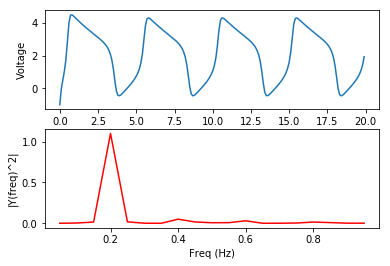

In [63]:
a=4.5
b=5
c=1
I=6


# 2. Make one solution
def fun(t, xy, a, b, c, I):
    newxy = [xy[0]*(a-xy[0])*(xy[0]-1)-xy[1]+I, b*xy[0] - c*xy[1] ]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
solver.set_f_params(a,b,c,I)


# Set up arrays of initial values
Vinit = [-1]
Winit = [0]


for j in range(len(Vinit)):

    # Set the initial values.
    t0 = 0.0 #initial time
    xy0 = [Vinit[j], Winit[j]] #[intial x, initial y]
    solver.set_initial_value(xy0, t0)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t1 = 20
    dt = .1
    numsteps=int((t1-t0)/dt) #number of steps including the initial
    t = np.arange(t0, t1, dt)
    sol = np.zeros((numsteps, 2))
    sol[0] = xy0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[i], and save the solution in sol[i].
    for i in range(numsteps):
        solver.integrate(t[i])
        sol[i] = solver.y

Fs = 1/dt # sampling rate  

fake_signal = sol[:,0]

# frequency stuff
n = len(fake_signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/t1  # two sides frequency range
num_freq = np.arange(1,np.ceil(n/10).astype(int)) # number of frequencies
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(fake_signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,fake_signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Voltage')
ax[1].plot(frq,ps,'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
#plt.title('FitzHugh - Nagumo model with a=' +str(a)+' b='+str(b)+' c=' +str(c)+' I='+ str(I))
plt.show()


It's easier to see the power spectrum without the zero frequency and limited to less than 1 Hz. That way there are two peaks one at 0.2 Hz and a smaller peak a bit above 0.4 Hz. Changing both a and the current I can shift the dominant frequency peak between 0.2 and 0.25, but for some parameter values it is insensitive to one or the other parameter.

### Rubric:

**Part 1:** 

 1.1 6 pts (2 pts per task)
 
 1.2 8 pts (2 pts for bifurcation + 2 pts per task)

**Part 2:** 

2.1 8 pts (2 pts for bifurcation + 2 pts per task)

2.2 8 pts (2 pts for bifurcation + 2 pts per task)

2.2 8 pts (2 pts for answers about voltage plot + 2 pts per power spectrum analysis + 2 points for analysis of $a$ dependence + 2 pts for analysis of $I$ dependence)

**Total: 38 pts**